# Brief Introduction

> Retail traders are normal people like you and me, who decide to jump into the stock market to try and make money out of it for ourselves. 

## Our defined problem:

### How can we predict the trend of a company's stock to gain better profits as a retail trader?
>In this project, we are going to attempt to predict the share price movements of a chosen company by training a model to trade.   
>In this case, we are considering Apple's stock listed as AAPL in the current market.


### (1) What kind of analysis will we be using in this project?

There are two main types of analysis done on stocks; Technical and Fundamental.

>Fundamental analysis is done by trying to measure the company's intrinsic value through data such as company balance sheets, and accounts.

>Technical analysis done by analysing the price action of a stock, such as the volume of shares traded everyday to determine the stock's supply and demand dynamics. 

In this project, we are focusing on **Technical Analysis**.

### (2) What is our goal in this project?

>Given the sheer amount of indicators available for use in trading, we've decide to focus on a particular group of indicators which are often used in trading strategies, Moving Averages (MA). 

>We plan to train our model to figure out which type of MA will help us to generate the best returns, which will then, be the best performing MA for traders to use.

> As a result, we will then, recommend, on the given dataset and the derived graphs, provide our recommendation at which we should, as a retail trader, be taking in such a stock to trade



In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import requests
import json 

#Additional Libraries
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set(font_scale = 1.5) # set the default Seaborn style for graphics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

# Constructing parameters to use API 

Key = "C4TMJ9NCKD4YDEQ9" # Api Key
url = "https://www.alphavantage.co/query?" # Website to request data from
daily = "TIME_SERIES_DAILY_ADJUSTED" # We are doing our analysis on data points of a daily basis.
stock = "AAPL" # Here we are making use of Apple's stock in our analysis

# parameters for "function" in the api.
param = {
    "function" : daily,
    "symbol" : stock,
    "apikey" : Key,
    "outputsize" : "full",
    "interval" : None,
    "time_period" : None,
    "series_type" : None
}

# Indicators that we plan to use

# SMA - Simple Moving Average
# EMA - Exponential Moving Average
# MACD - Moving Average Convergence / Divergence
# SOTCH - Stochastic Oscillator
# RSI - Relative Strength Index
# ADX - Average Directional Movement Index
# CCI - Commidity Channel Index
# AROON -  Aroon Indicator
# BBANDS - Bollinger Bands
# AD - Chaikin A/D line
# OBV - Balance Volume Values


### Due to the constraints of the AlphaVantage API (only 5 pull requests per minute and up to 500 requests per day) and the amount of data we are pulling is likely going to exceed that amount, we have decided to save the pulled requests into files, so we can easily access them and analyse them without encountering any problems.

In [2]:
#Request data from AlphaVantage - data of company's stock price over the past 20 years
#response = requests.get(url,param) # Request for Time-Series Data of stocks
#data = response.json() # Convert Data into json format, and put them into dataframes.
#with open("Data\Stock Time Series Data\AAPL4.json",'w') as json_file:
#   json.dump(data, json_file)
#jsondata = pd.read_json("Data\Stock Time Series Data\AAPL4.json")

# Request data from AlphaVantage
# param["function"] = 'SMA'
# param["interval"] = 'daily'
# param["time_period"] = '10'
# param["series_type"] = 'close'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\SMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\SMA10.json")

# param["function"] = 'EMA'
# param["interval"] = 'daily'
# param["time_period"] = '12'
# param["series_type"] = 'close'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\EMA12.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\EMA12.json")

# param["function"] = 'WMA'

# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\WMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\WMA10.json")

# param["function"] = 'DEMA'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\DEMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\DEMA10.json")

# param["function"] = 'TEMA'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\TEMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\TEMA10.json")

# param["function"] = 'TRIMA'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\TRIMA10.json",'w') as json_file:
#     json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\TRIMA10.json")

# param["function"] = 'KAMA'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\KAMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\KAMA10.json")

#param["function"] = 'MAMA'
#response = requests.get(url,param) # Request for Time-Series Data of stocks
#data = response.json() # Convert Data into json format, and put them into dataframes.
#with open("Data\Indicators\MAMA10.json",'w') as json_file:
#    json.dump(data, json_file)
#jsondata = pd.read_json("Data\Indicators\MAMA10.json")



In [3]:
with open("Data\Stock Time Series Data\AAPL4.json") as json_file: 
    jsonStock = json.load(json_file)
rawStockPrice = pd.DataFrame(jsonStock["Time Series (Daily)"]).T
rawStockPrice.head() # Taking a quick look to see what the data looks like.

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-04-19,133.51,135.47,133.34,134.84,134.84,94264215,0.0000,1.0
2021-04-16,134.3,134.67,133.28,134.16,134.16,84922386,0.0000,1.0
2021-04-15,133.82,135.0,133.64,134.5,134.5,89347102,0.0000,1.0
2021-04-14,134.94,135.0,131.655,132.03,132.03,87222782,0.0000,1.0
2021-04-13,132.44,134.66,131.93,134.43,134.43,91266545,0.0000,1.0


## Table: Stock Price Data Obtained From AlphaVantage

For TA's information,

**Open** is the price of the stock when the market has **started that day**. (Usually 9.30AM ET)

**High** is the **highest price** the stock managed to reach that day.

**Low** is the **lowest price** the stock managed to reach that day.

**Close** is the price of the stock when the market has **closed that day**. (Usually 5.30PM ET)

**Volume** is the amount of shares traded that day. (Bought and Sold)

After taking a quick look at the data, we proceed to clean and organise the data, as well as taking only the first 2000 points as a standardisation. 

We use .info() to check the check some basic information about our data.

In [4]:
stockPrice = rawStockPrice.iloc[6:2006] # We start from 6 as this data is retrieved at a later date than the rest of the data we have, thus there are extra datapoints that we did not need.
stockPrice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2021-04-09 to 2013-05-01
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   1. open               2000 non-null   object
 1   2. high               2000 non-null   object
 2   3. low                2000 non-null   object
 3   4. close              2000 non-null   object
 4   5. adjusted close     2000 non-null   object
 5   6. volume             2000 non-null   object
 6   7. dividend amount    2000 non-null   object
 7   8. split coefficient  2000 non-null   object
dtypes: object(8)
memory usage: 140.6+ KB


#### All the lines in the next box are commented as we have already gathered the data from the API. We're just leaving it here so the TA knows where our data came from.


In [5]:
# We load up all the required files here.
# We clean up the data by taking only the data we need, creating a dataframe for every indicator collected, 
# and only take the first 2000 points. 
with open("Data\Stock Time Series Data\AAPL4.json") as json_file: 
    jsonStock = json.load(json_file)
stockPrice = pd.DataFrame(jsonStock["Time Series (Daily)"],["5. adjusted close"]).T.iloc[6:2006]
stockPrice = stockPrice.rename(columns={"5. adjusted close" : 'Close'})

with open("Data\Indicators\SMA10.json") as json_file: 
    jsonSMA10 = json.load(json_file)
SMA10 = pd.DataFrame(jsonSMA10["Technical Analysis: SMA"]).T.iloc[:2000]

with open("Data\Indicators\EMA12.json") as json_file: 
    jsonEMA12 = json.load(json_file)
EMA12 = pd.DataFrame(jsonEMA12["Technical Analysis: EMA"]).T.iloc[:2000]

with open("Data\Indicators\WMA10.json") as json_file: 
    jsonWMA10 = json.load(json_file)
WMA10 = pd.DataFrame(jsonWMA10["Technical Analysis: WMA"]).T.iloc[:2000]

with open("Data\Indicators\DEMA10.json") as json_file: 
    jsonDEMA10 = json.load(json_file)
DEMA10 = pd.DataFrame(jsonDEMA10["Technical Analysis: DEMA"]).T.iloc[:2000]

with open("Data\Indicators\TEMA10.json") as json_file: 
    jsonTEMA10 = json.load(json_file)
TEMA10 = pd.DataFrame(jsonTEMA10["Technical Analysis: TEMA"]).T.iloc[:2000]

with open("Data\Indicators\TRIMA10.json") as json_file: 
    jsonTRIMA10 = json.load(json_file)
TRIMA10 = pd.DataFrame(jsonTRIMA10["Technical Analysis: TRIMA"]).T.iloc[:2000]

with open("Data\Indicators\KAMA10.json") as json_file: 
    jsonKAMA10 = json.load(json_file)
KAMA10 = pd.DataFrame(jsonKAMA10["Technical Analysis: KAMA"]).T.iloc[:2000]

with open("Data\Indicators\MAMA10.json") as json_file: 
    jsonMAMA10 = json.load(json_file)
MAMA10 = pd.DataFrame(jsonMAMA10["Technical Analysis: MAMA"]).T.iloc[:2000]


---

In [6]:
# We combine the collected data here, so we can easily see the data of each technical indicator.

combine = [stockPrice, SMA10, EMA12, WMA10, DEMA10, TEMA10, TRIMA10, KAMA10, MAMA10]



result = pd.concat(combine, axis=1).astype(float)
result = result.iloc[::-1]

result['PercentageChange'] = pd.Series(dtype ='float')
result['PercentageChange'] = result['Close'].pct_change()

result['Class'] = pd.Series(dtype ='string')
for i in range(2000):
    if result['PercentageChange'][i] > 0 : result['Class'][i] = 'Up'
    else: result['Class'][i] = 'Down'
result['Class'] = result['Class'].astype("category")

result.head()

,Close,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA,FAMA,PercentageChange,Class
2013-05-01,13.711425,12.8928,13.1774,13.1721,13.3657,13.6398,12.8460,13.1490,15.5327,14.9082,NaN,Down
2013-05-02,13.905880,13.0597,13.2895,13.3563,13.5687,13.8542,13.0354,13.3874,15.5165,14.9112,0.014182,Up
2013-05-03,14.045089,13.2452,13.4057,13.5354,13.7616,14.0468,13.2420,13.6185,15.5017,14.9142,0.010011,Up
2013-05-06,14.380001,13.4389,13.5556,13.7418,14.0109,14.3114,13.4526,13.8885,15.4905,14.9171,0.023846,Up
2013-05-07,14.315952,13.6028,13.6726,13.9012,14.1688,14.4414,13.6470,14.0185,15.4788,14.9199,-0.004454,Down


In [7]:
result.info() # We check once again to ensure the datatypes are what we want.

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2013-05-01 to 2021-04-09
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Close             2000 non-null   float64 
 1   SMA               2000 non-null   float64 
 2   EMA               2000 non-null   float64 
 3   WMA               2000 non-null   float64 
 4   DEMA              2000 non-null   float64 
 5   TEMA              2000 non-null   float64 
 6   TRIMA             2000 non-null   float64 
 7   KAMA              2000 non-null   float64 
 8   MAMA              2000 non-null   float64 
 9   FAMA              2000 non-null   float64 
 10  PercentageChange  1999 non-null   float64 
 11  Class             2000 non-null   category
dtypes: category(1), float64(11)
memory usage: 269.5+ KB


### We combine all our Indicators and Stock Price data into a dataframe, so we can analyse them together easily.

### We have also included two new columns, PercentageChange and Class.

> PercentageChange calculates the change in stock price compared to the day before. Therefore, our first row is NaN, as there is no previous price to refer to.

### Class is a **categorical** column derived from PercentageChange. 
> If the PercentageChange is **positive**, Class will categorise it as **Up**, which means the stock price has increased in comparison to the day before.

> If the PercentageChange is **negative**, Class will categorise it as **Down**, which means the stock price has decreased in comparison to the day before. In the special case of the first row which is NaN, we've regarded it as Down as well.

---

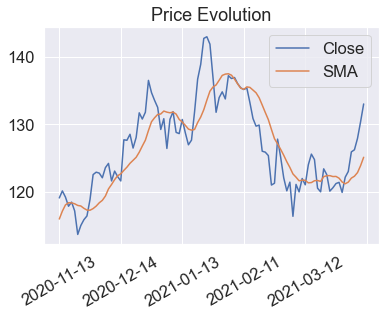

In [8]:
# Lets take a look at how the stockPrice and SMA looks like in a graph, as an example.

result.iloc[1900:2000].plot(y= ['Close','SMA'])
plt.title('Price Evolution')
plt.xticks(rotation = 30)
plt.legend(result.columns)

### We have only picked the latest 100 days for this graph to have a clearer view of the SMA and AAPL stock lines.

### The blue line represents the price of the AAPL stock, while SMA, denoted by oranges, shows us the moving average of the stock price, averaged out over the past 20 days from its recent point. 

### SMA is one of the indicators used to determine if a stock price is underpriced or overvalued. 

> If we **possess** AAPL Stocks:
>> If the Stock Price is **above** the SMA line, it means the stock is **currently overvalued** and we should **consider selling** the stock.  
>> If the Stock Price is **below** the SMA line, it means the stock is **currently undervalued** and we should **consider holding on** to the stock **OR** buy more stocks to take advantage of the undervalued stock.

> If we **do not possess** AAPL Stocks:
>> If the Stock Price is **above** the SMA line, it means that the stock is **overvalued** and we should **not be buying** the stock.  
>> If the Stock Price is **below** the SMA line, it means that the stock is **undervalued** and we **can consider buying** the stock.

### Important to note: All decision pertaining to selling, holding on, buying varies from one person to another. 
### Kindly note that this only has to be served as a reference and are not to be held responsible for any loss, if suffered from any.

In [9]:
result.corr()

,Close,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA,FAMA,PercentageChange
Close,1.000000,0.998264,0.998455,0.998981,0.999475,0.999675,0.997999,0.997838,0.983481,0.960380,0.039225
SMA,0.998264,1.000000,0.999897,0.999837,0.999193,0.998614,0.999962,0.999518,0.986138,0.962069,0.012470
EMA,0.998455,0.999897,1.000000,0.999802,0.999127,0.998675,0.999811,0.999617,0.987160,0.963055,0.013623
WMA,0.998981,0.999837,0.999802,1.000000,0.999727,0.999378,0.999797,0.999353,0.985429,0.961652,0.014577
DEMA,0.999475,0.999193,0.999127,0.999727,1.000000,0.999877,0.999117,0.998563,0.983214,0.959871,0.018814
TEMA,0.999675,0.998614,0.998675,0.999378,0.999877,1.000000,0.998493,0.998078,0.983201,0.960084,0.022210
TRIMA,0.997999,0.999962,0.999811,0.999797,0.999117,0.998493,1.000000,0.999450,0.985910,0.961823,0.010510
KAMA,0.997838,0.999518,0.999617,0.999353,0.998563,0.998078,0.999450,1.000000,0.986506,0.962309,0.012887
MAMA,0.983481,0.986138,0.987160,0.985429,0.983214,0.983201,0.985910,0.986506,1.000000,0.986966,0.013534
FAMA,0.960380,0.962069,0.963055,0.961652,0.959871,0.960084,0.961823,0.962309,0.986966,1.000000,0.018952


### Here we look at the correlation of close and all the moving averages. 


### Below is a correlation heatmap, which is easier to look at.

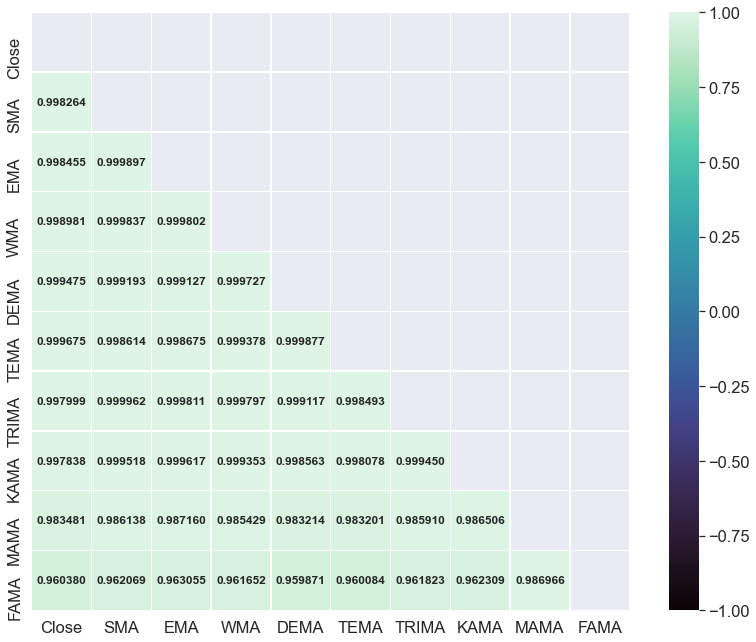

In [10]:
# Print the heatmap between all variables to get a numerical evidence of the relationship to visualise easily

# Here, we extended our application of what we learnt in the course pertaining to the heatmap
# representation by masking the other half of the heatmap. 
# It is also indirectly saying that we are only going to be focusing on the Upper Triangular in the concept
# of Matrixes.

corr = np.corrcoef(np.random.randn(10, 20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(14, 11))
    ax = sb.heatmap(result.loc[:, result.columns != 'PercentageChange'].corr(), mask=mask, vmin = -1, vmax=1, cmap = "mako", 
                    annot = True, annot_kws ={'size':12, 'weight':'bold'}, fmt = ".6f", linewidths = .5, square=True)        

From the heatmap representation above, it can be clearly seen that there are **numerous MA indicator** that provides an **extreme linear relationship** when compared against the **close price at the end of each trading days**.

Hence, it is not surprising to see the correlation between the stock price and moving averages is extremely high, as the moving averages are derived from the stock price. 

In [11]:
MA = [SMA10, EMA12, WMA10, DEMA10, TEMA10, TRIMA10, KAMA10, MAMA10]

MA = pd.concat(MA, axis=1).astype(float)
MA = MA.iloc[::-1]
MA.head(10)

,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA,FAMA
2013-05-01,12.8928,13.1774,13.1721,13.3657,13.6398,12.8460,13.1490,15.5327,14.9082
2013-05-02,13.0597,13.2895,13.3563,13.5687,13.8542,13.0354,13.3874,15.5165,14.9112
2013-05-03,13.2452,13.4057,13.5354,13.7616,14.0468,13.2420,13.6185,15.5017,14.9142
2013-05-06,13.4389,13.5556,13.7418,14.0109,14.3114,13.4526,13.8885,15.4905,14.9171
2013-05-07,13.6028,13.6726,13.9012,14.1688,14.4414,13.6470,14.0185,15.4788,14.9199
2013-05-08,13.7850,13.7964,14.0603,14.3329,14.5822,13.8288,14.1680,15.4688,14.9226
2013-05-09,13.9456,13.8819,14.1634,14.4060,14.6002,13.9903,14.2147,15.4576,14.9253
2013-05-10,14.0667,13.9359,14.2156,14.4137,14.5397,14.1194,14.2179,15.4454,14.9279
2013-05-13,14.1530,13.9902,14.2560,14.4312,14.5084,14.2114,14.2276,15.4338,14.9304
2013-05-14,14.1656,13.9835,14.2184,14.3253,14.3195,14.2593,14.2242,15.4189,14.9329



Relation between Close and SMA

Intercept 	: b =  [-0.00238817]
Coefficients: a =  [[1.00427757]]

Explained Variance (R^2) 	: 0.9945160848611404
Mean Squared Error (MSE) 	: 0.020073936310136344


Relation between Close and EMA

Intercept 	: b =  [-0.05025291]
Coefficients: a =  [[1.00664704]]

Explained Variance (R^2) 	: 0.9949426185860424
Mean Squared Error (MSE) 	: 0.03148520053634299


Relation between Close and WMA

Intercept 	: b =  [-0.02193314]
Coefficients: a =  [[1.00350049]]

Explained Variance (R^2) 	: 0.9968785768574634
Mean Squared Error (MSE) 	: 0.00951232302443013


Relation between Close and DEMA

Intercept 	: b =  [0.03603343]
Coefficients: a =  [[0.99897371]]

Explained Variance (R^2) 	: 0.9984727814090167
Mean Squared Error (MSE) 	: 0.0001598288363721987


Relation between Close and TEMA

Intercept 	: b =  [0.02170473]
Coefficients: a =  [[0.99930431]]

Explained Variance (R^2) 	: 0.999061338528014
Mean Squared Error (MSE) 	: 6.723046136906745e-05


Relation betwee

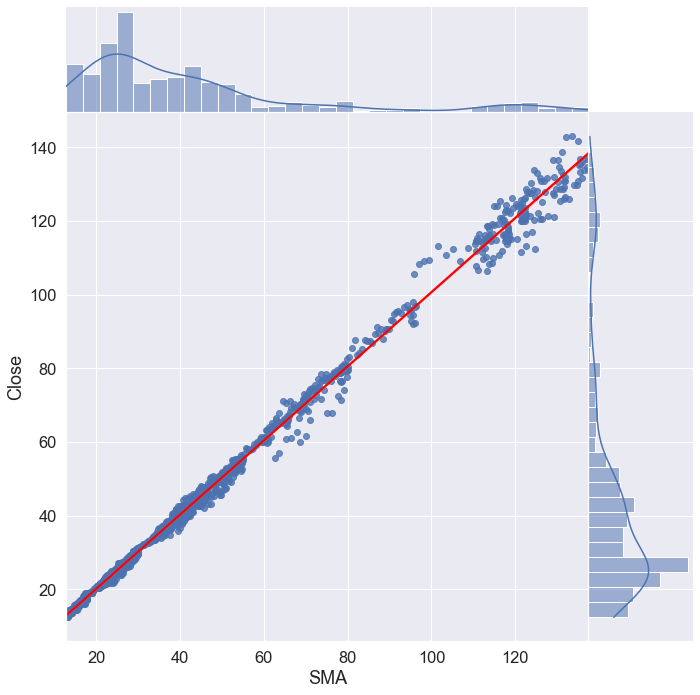

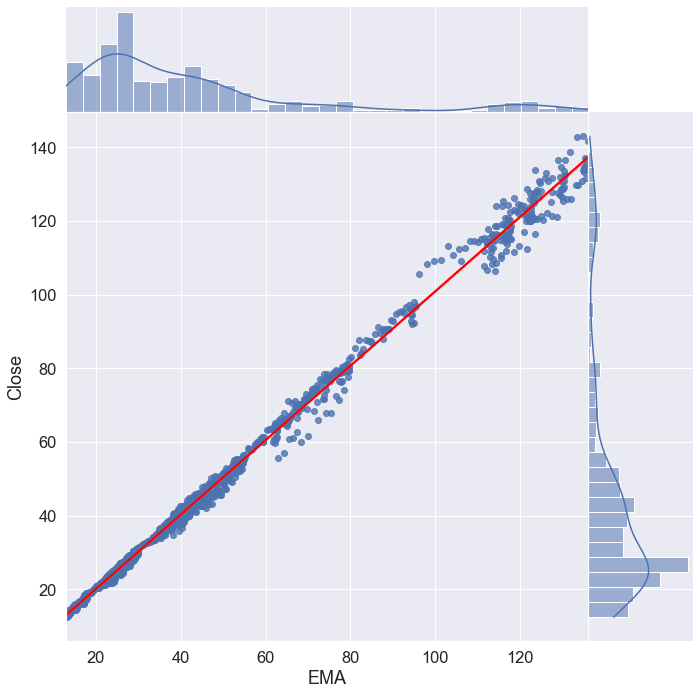

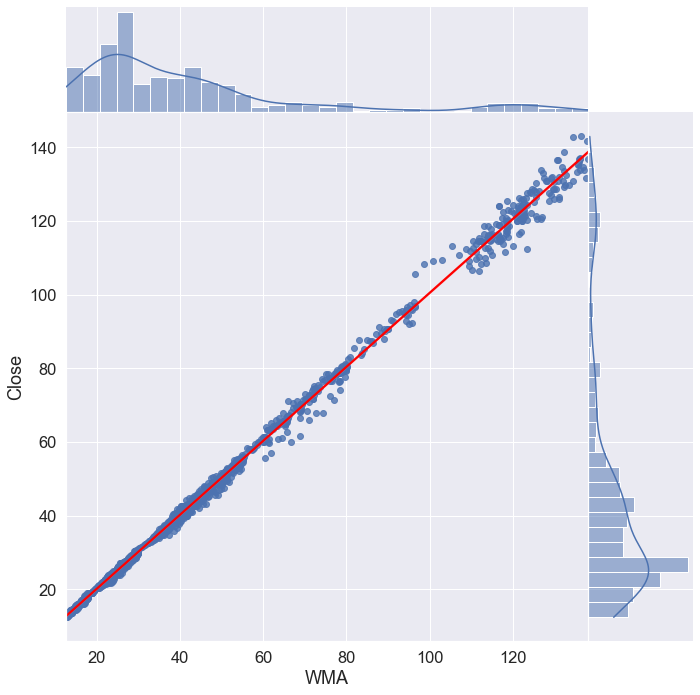

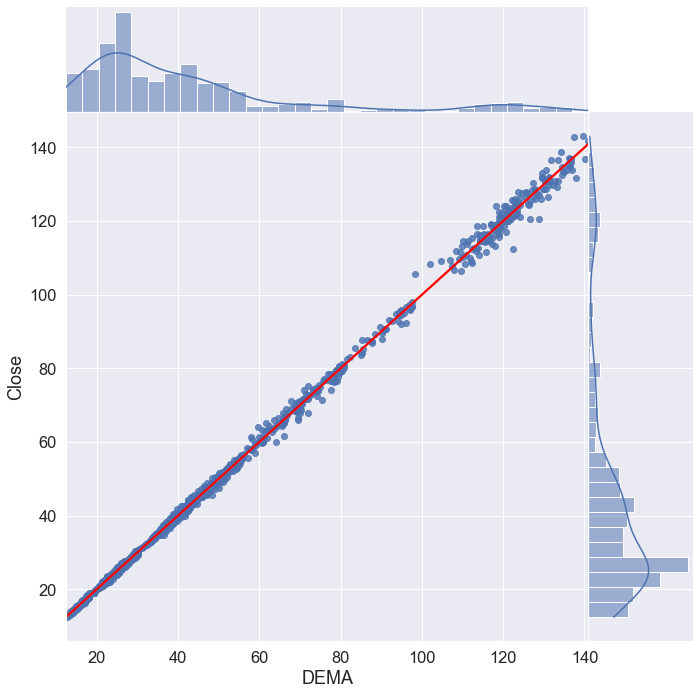

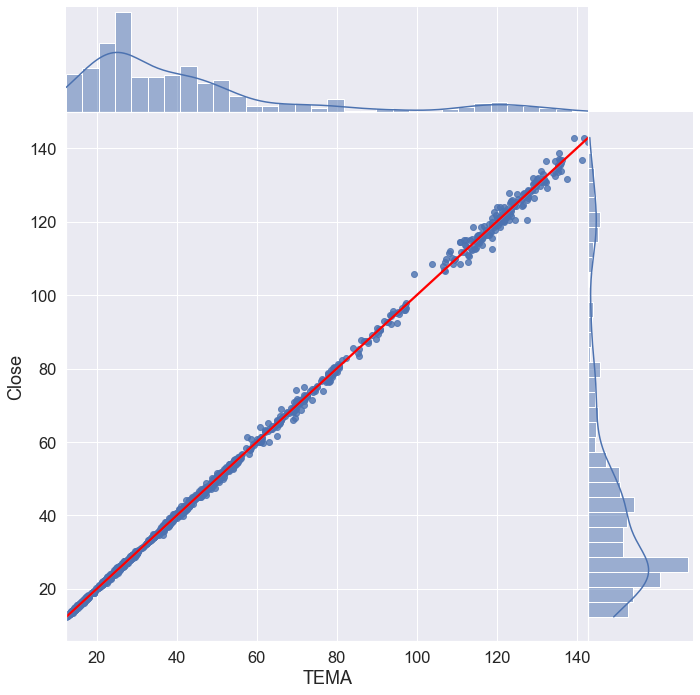

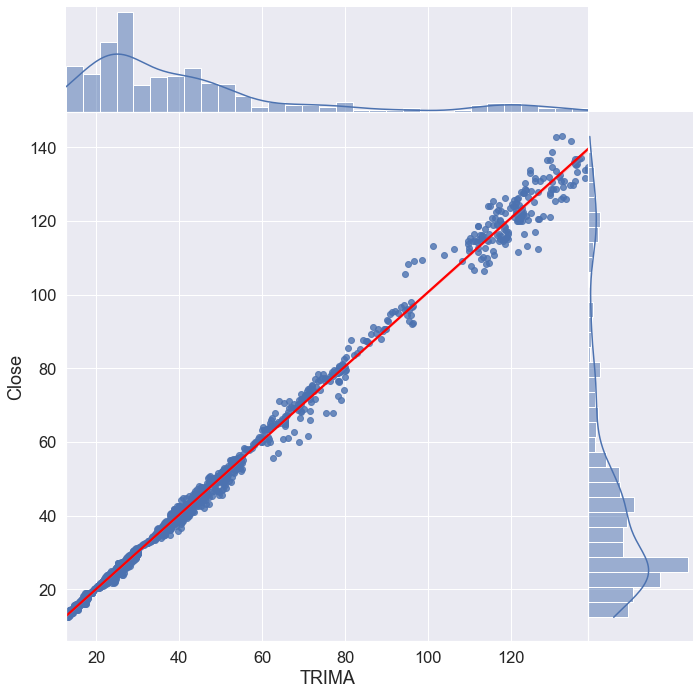

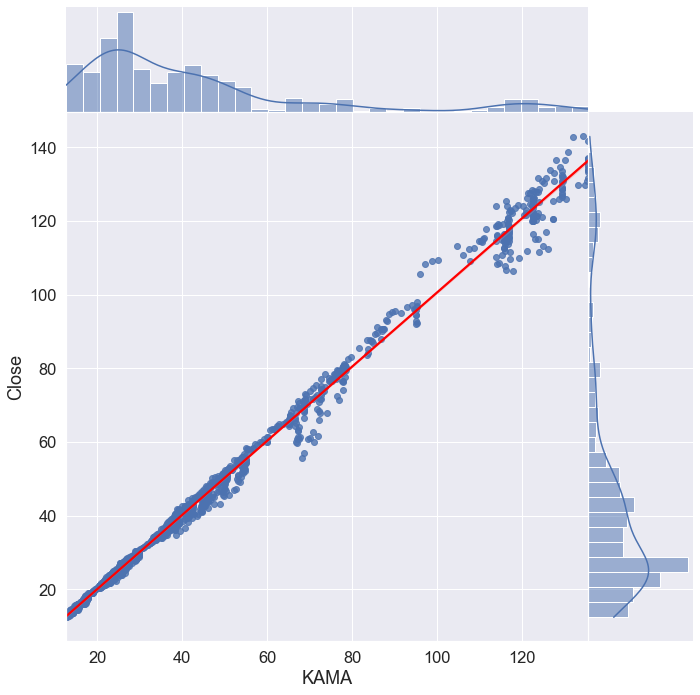

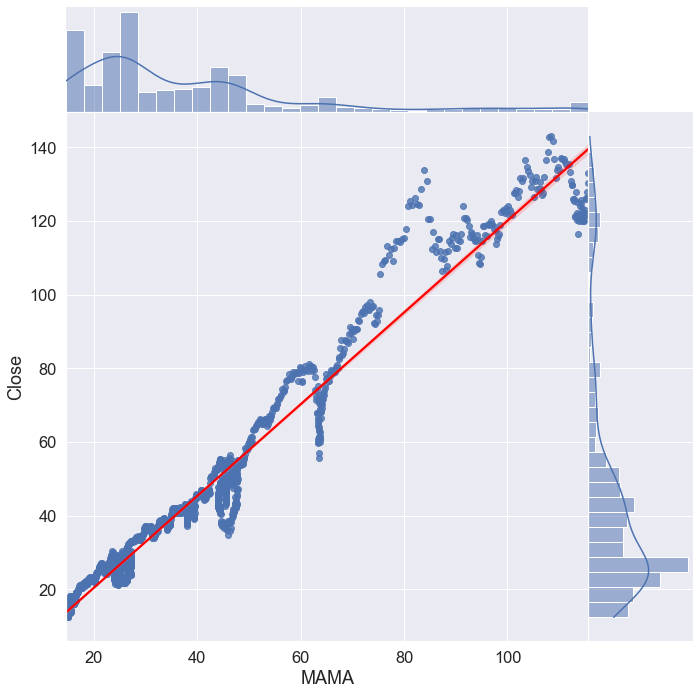

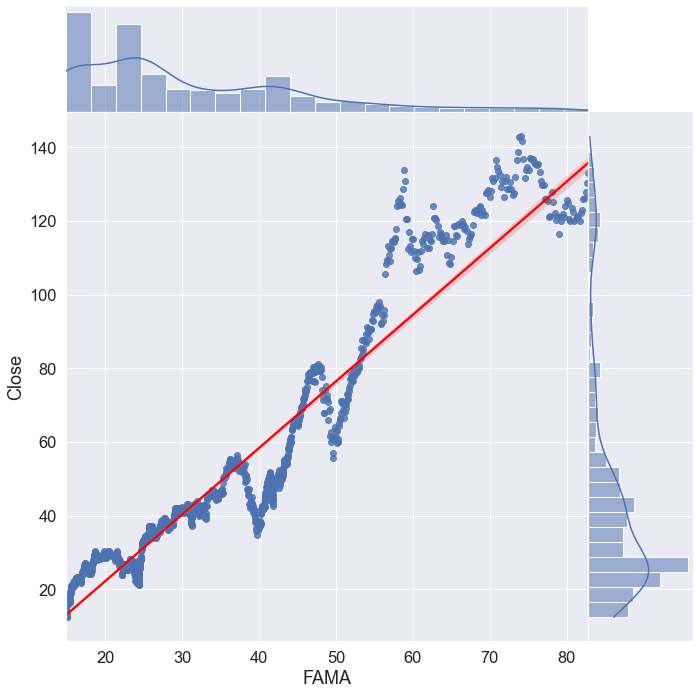

In [12]:
# d = predictor, Moving Averages.
# e = response, close price.


e = pd.DataFrame(result['Close']) # Response
for counter, item in enumerate(MA):
    d = pd.DataFrame(MA[item]) # We need to pass a dataframe instead of MA[item] directly
    
    d_train, d_test, e_train, e_test = train_test_split(d, e, test_size = 360)
    
    linreg.fit(d_train,e_train) 
    
    e_train_pred = linreg.predict(e_train)
    
    print('====================================================')
    print()
    print('Relation between Close and', item)
    print()
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients: a = ', linreg.coef_)
    print()
    print("Explained Variance (R^2) \t:", linreg.score(d_train, e_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(e_train, e_train_pred))
    print()
    jointDF = pd.concat([e, d], axis = 1).reindex(e.index)
    sb.jointplot(data = jointDF, x = item, y = "Close", height = 10, kind = "reg", joint_kws={'line_kws':{'color':'red'}}, space = 0)


# Testing for Linear Regression 

Moving on, we then proceed to split the data into 2 parts:

> Train Data 70%

> Test Data 30%

### Let's try another form of machine learning model instead : Decision Trees.

In [13]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

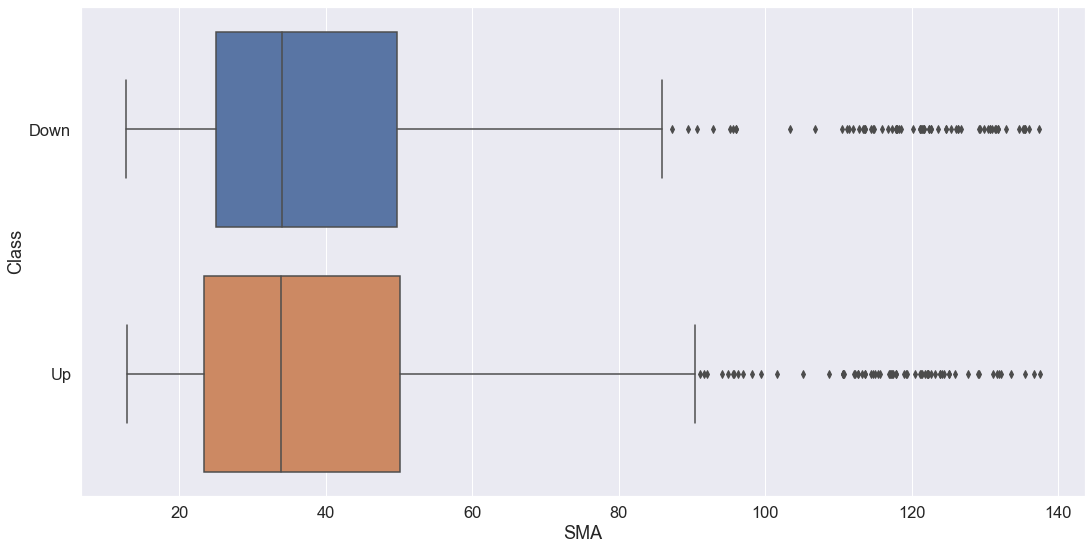

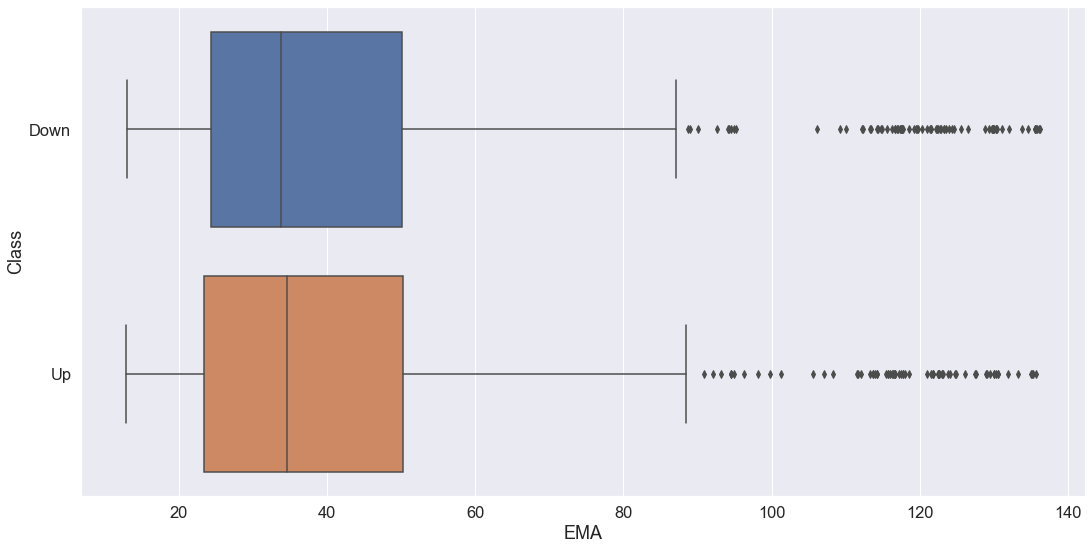

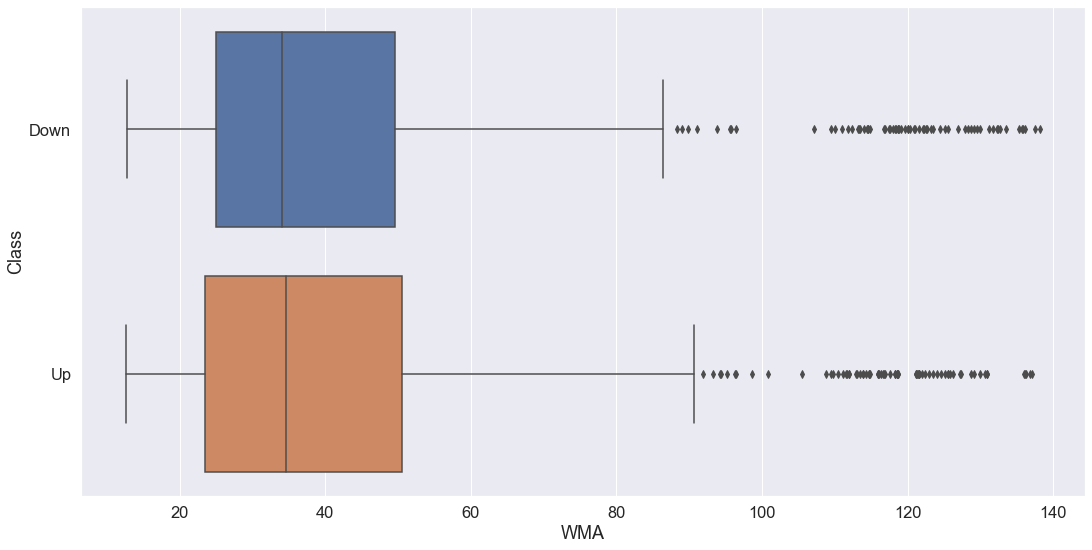

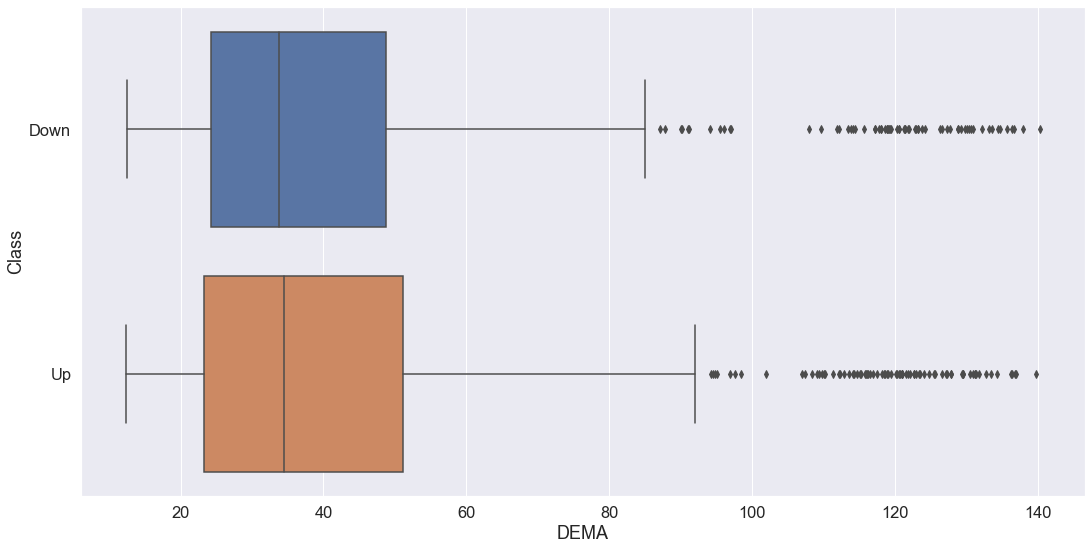

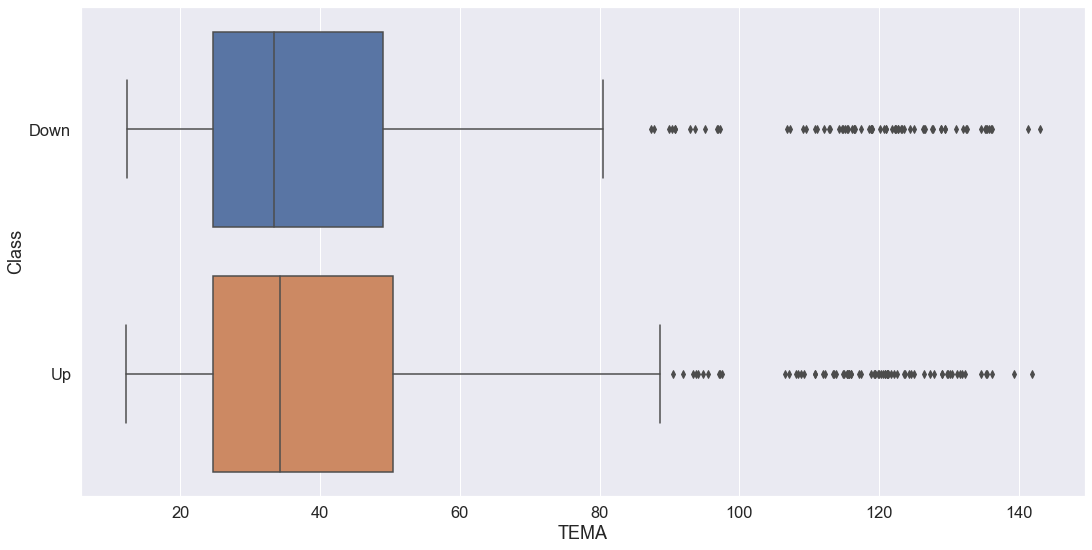

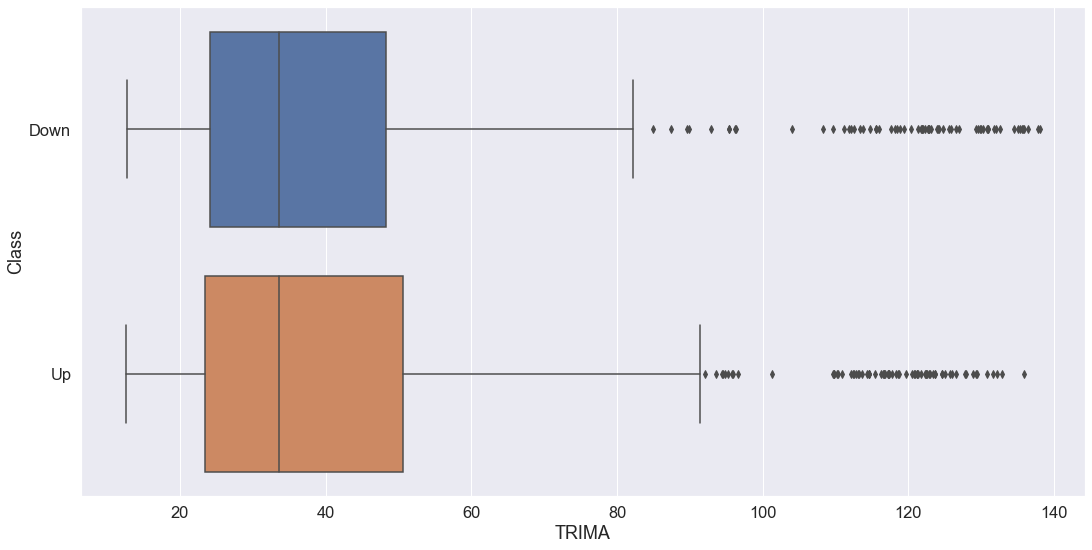

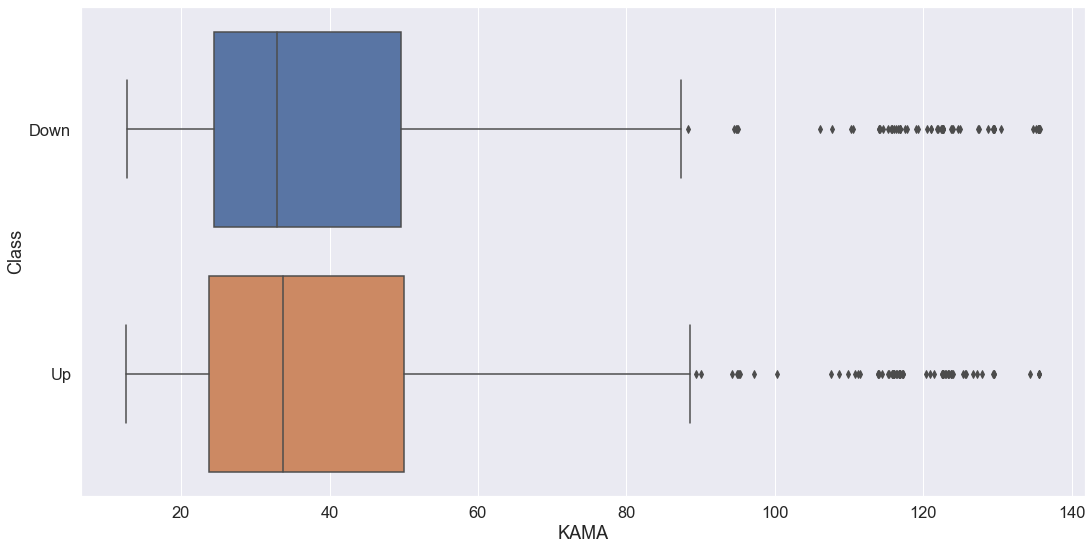

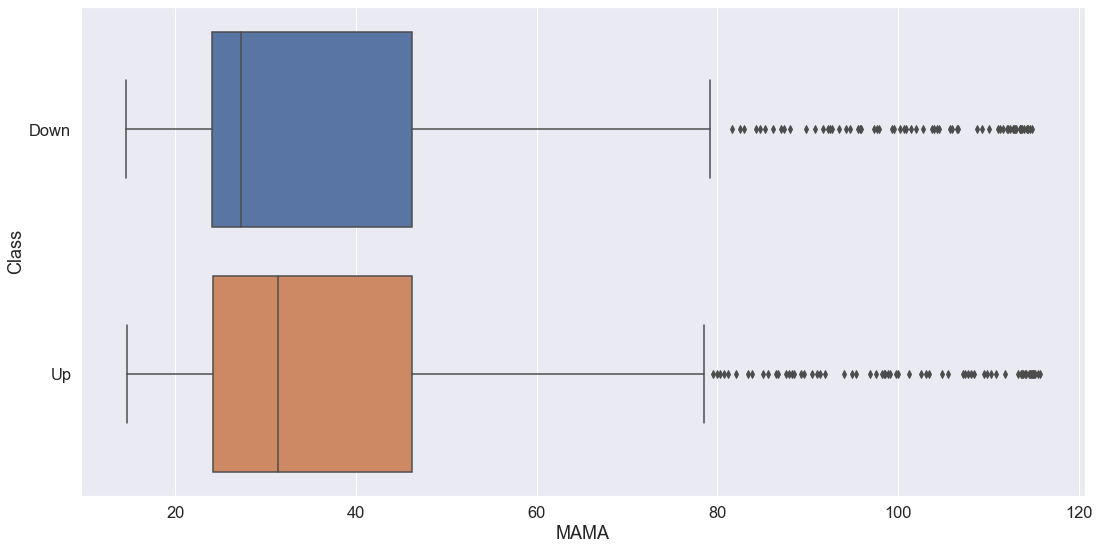

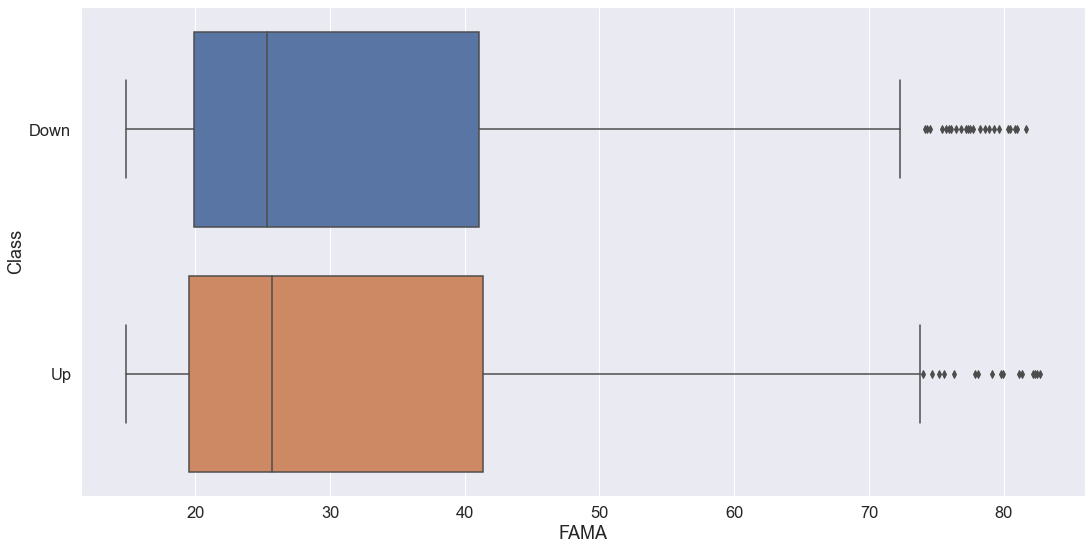

In [21]:
#storage for classification accuracy
dectreescore_train = []
dectreescore_test = []

#storage for confusion matrix
cm_train = []
cm_test = []

CT_response = pd.DataFrame(result['Class']) # Category 


for counter, item in enumerate(MA):
    
    CT_predictor = pd.DataFrame(MA[item]) # We need to pass a dataframe instead of MA[item] directly for iteration to work
    
    CT_predictor_train, CT_predictor_test, CT_response_train, CT_response_test = train_test_split(CT_predictor, CT_response, test_size = 0.25 )
    #if counter == 0:
    #    sb.catplot(y = 'Class', data = CT_response_train, kind = "count")
    
    dfTrain = pd.concat([CT_response_train,CT_predictor_train], axis = 1).reindex(CT_response_train.index)

    f, axes = plt.subplots(1,1, figsize=(18, 9))

    sb.boxplot(x = item, y = "Class", data = dfTrain, orient = "h", )   
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
    dectree.fit(CT_predictor_train, CT_response_train) # train the decision tree model

    # Predict Response corresponding to Predictors
    
    CT_response_train_pred = dectree.predict(CT_predictor_train) 
    CT_response_test_pred = dectree.predict(CT_predictor_test)

    #Store the values so we can loop the printing of classification accuracy later
    dectreescore_train.append(dectree.score(CT_predictor_train, CT_response_train))
    dectreescore_test.append(dectree.score(CT_predictor_test, CT_response_test))
    
    #Store the values so we can loop the printing of confusion matrix later
    cm_train.append(confusion_matrix(CT_response_train, CT_response_train_pred))
    cm_test.append(confusion_matrix(CT_response_test, CT_response_test_pred))


In [22]:
# Not completed OR we can leave it as it is
# Idea: We can store this in a table instead for better readability


for counter, item in enumerate(MA):
    print('====================================================')
    print("Goodness of Fit of Model \tTrain Dataset for", item )
    print("Classification Accuracy \t:", dectreescore_train[counter])
    print()    
    print('====================================================')
    print("Goodness of Fit of Model \tTest Dataset for ", item)
    print("Classification Accuracy \t:", dectreescore_test[0])
    print()


Goodness of Fit of Model 	Train Dataset for SMA
Classification Accuracy 	: 0.54

Goodness of Fit of Model 	Test Dataset for  SMA
Classification Accuracy 	: 0.536

Goodness of Fit of Model 	Train Dataset for EMA
Classification Accuracy 	: 0.53

Goodness of Fit of Model 	Test Dataset for  EMA
Classification Accuracy 	: 0.536

Goodness of Fit of Model 	Train Dataset for WMA
Classification Accuracy 	: 0.5433333333333333

Goodness of Fit of Model 	Test Dataset for  WMA
Classification Accuracy 	: 0.536

Goodness of Fit of Model 	Train Dataset for DEMA
Classification Accuracy 	: 0.548

Goodness of Fit of Model 	Test Dataset for  DEMA
Classification Accuracy 	: 0.536

Goodness of Fit of Model 	Train Dataset for TEMA
Classification Accuracy 	: 0.5446666666666666

Goodness of Fit of Model 	Test Dataset for  TEMA
Classification Accuracy 	: 0.536

Goodness of Fit of Model 	Train Dataset for TRIMA
Classification Accuracy 	: 0.5573333333333333

Goodness of Fit of Model 	Test Dataset for  TRIMA
Class

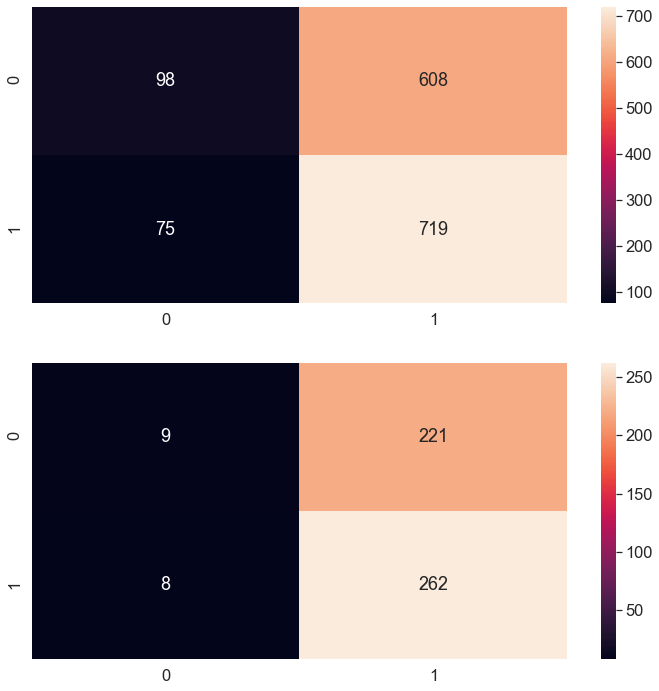

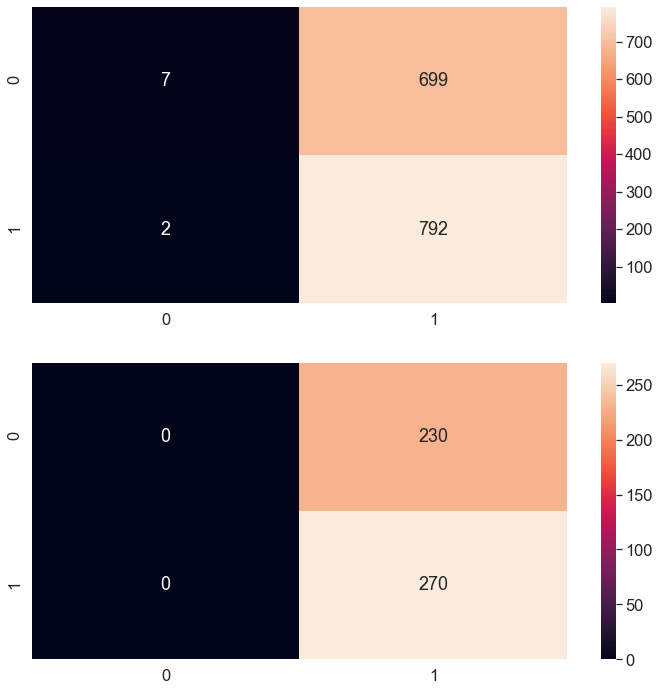

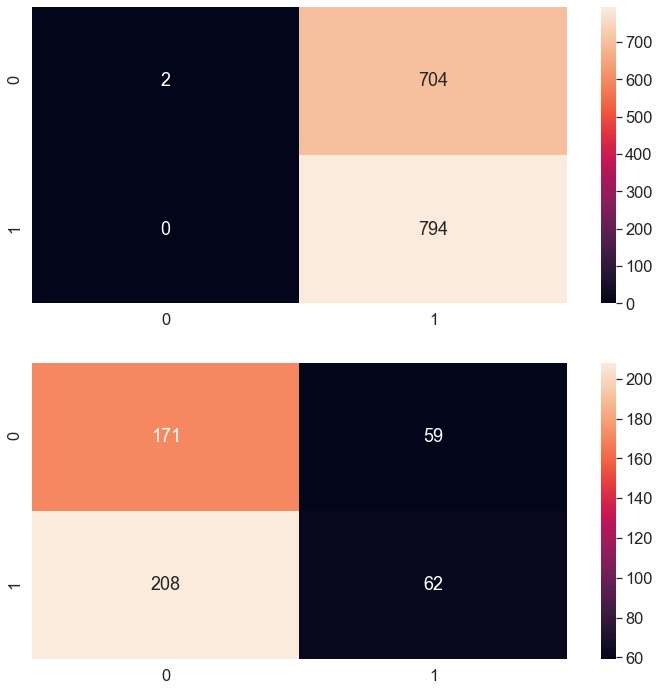

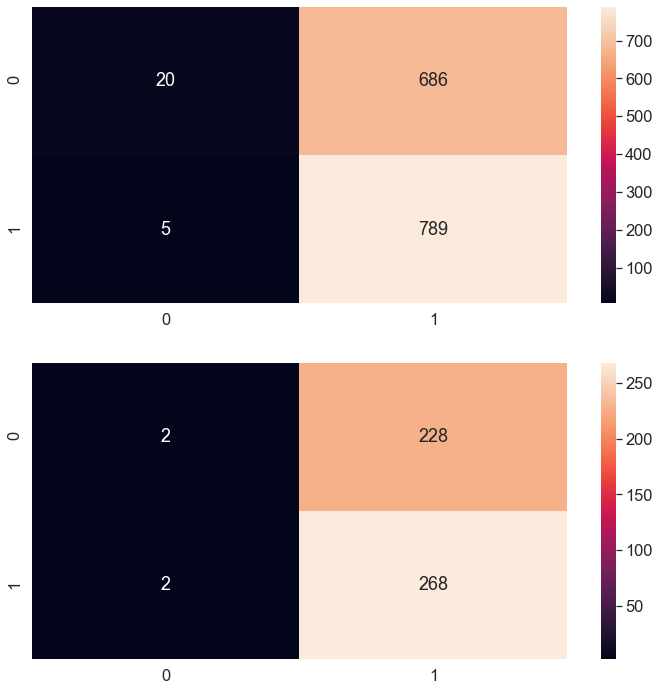

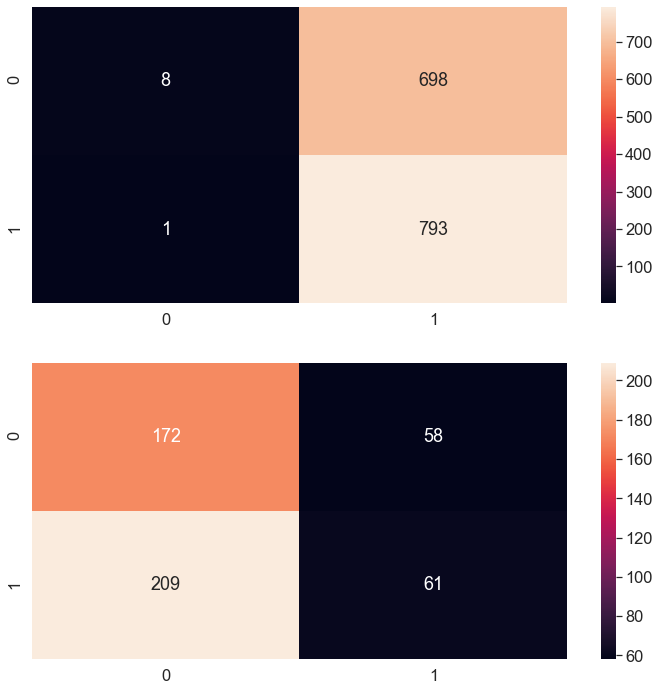

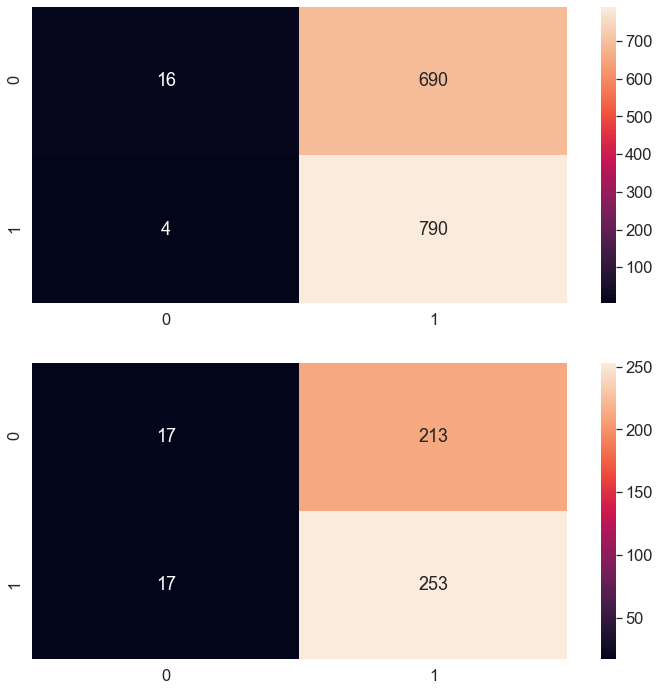

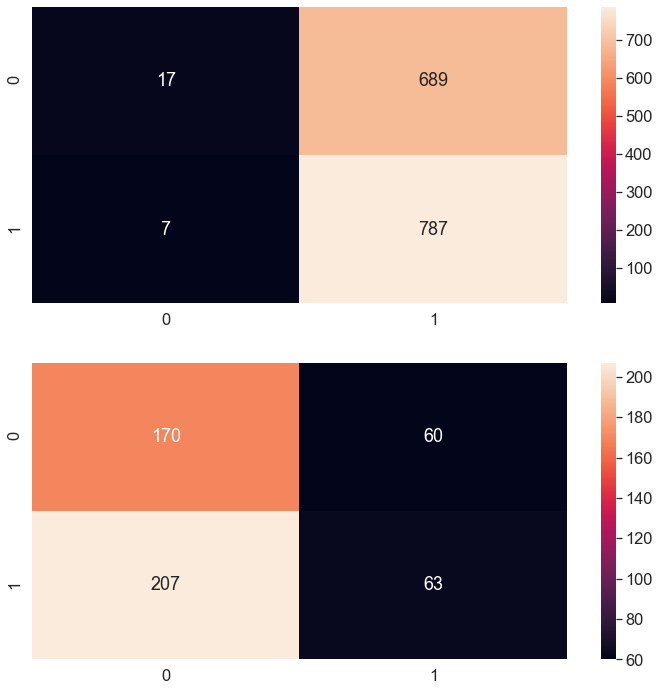

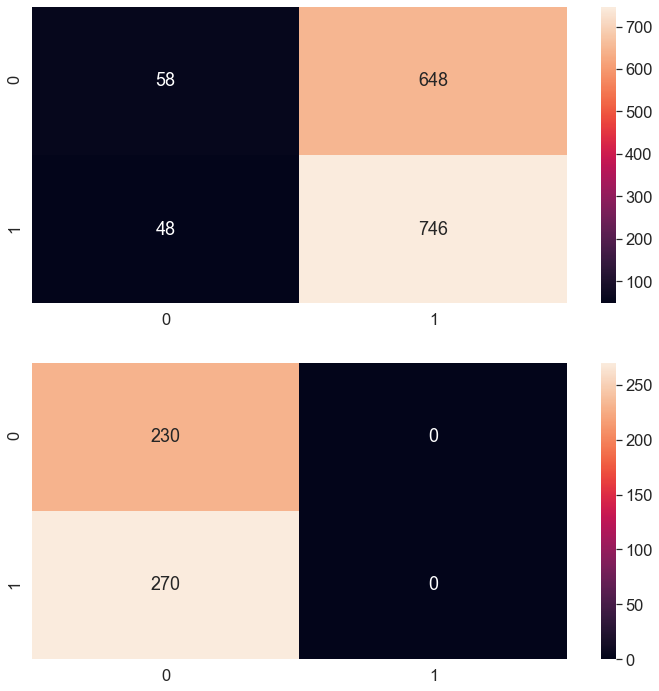

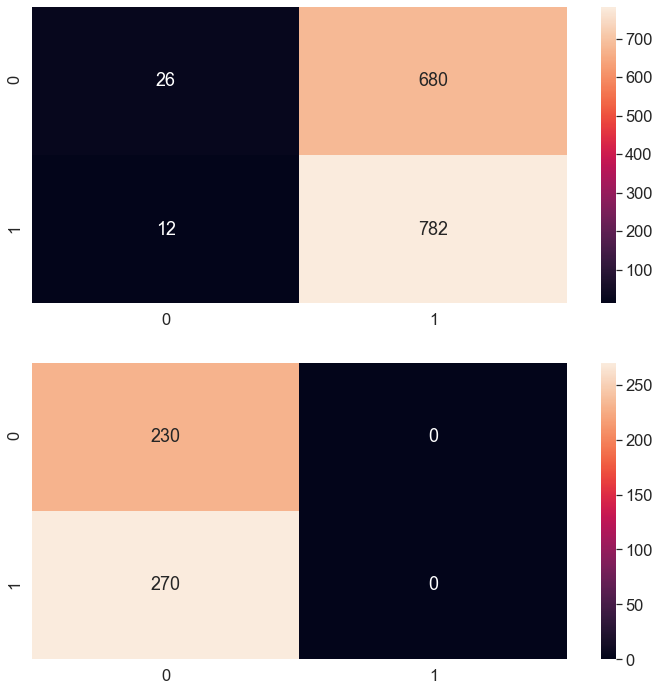

In [16]:
# NOT COMPLETED
# Plot the Confusion Matrix for Train and Test
for counter, item in enumerate(MA):
    f, axes = plt.subplots(2, 1, figsize=(12, 12))
    sb.heatmap(cm_train[counter],
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(cm_test[counter],
              annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


References we have used to learn to code

https://realpython.com/api-integration-in-python/

https://blog.quantinsti.com/use-decision-trees-machine-learning-predict-stock-movements/

NameError: name 'predictor_train' is not defined

<Figure size 864x864 with 0 Axes>